## Task-02
Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

## Data Cleaning
Handle Missing Values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path =("B:\\6th sem\\Internship\\Titanic-Dataset.csv")
df1 = pd.read_csv(file_path)

In [3]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(df1.info())
print(df1.describe())
print(df1.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [5]:
missing_values = df1.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
df1['Age'].fillna(df1['Age'].median(), inplace=True)

df1['Embarked'].fillna(df1['Embarked'].mode()[0], inplace=True)

df1.drop(columns=['Cabin'], inplace=True)

In [7]:
df1['Sex'] = df1['Sex'].map({'male': 0, 'female': 1})
df1 = pd.get_dummies(df1, columns=['Embarked'], drop_first=True)

print(df1.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500           0           1  
1          PC 17599  71.2833           0           0  
2  STON/O2. 3101282   7.9250           0           1  
3            113803  53.1000           0           1  
4            373450  

## Exploratory Data Analysis (EDA)
Summary Statistics

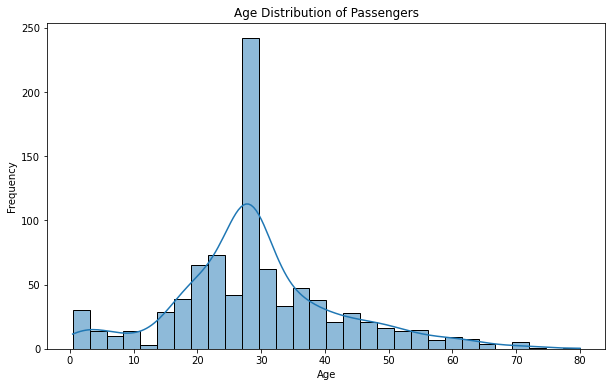

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['Age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

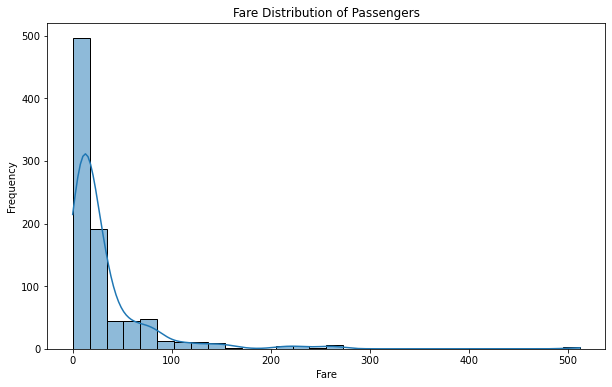

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['Fare'], bins=30, kde=True)
plt.title('Fare Distribution of Passengers')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

## Bivariate Analysis

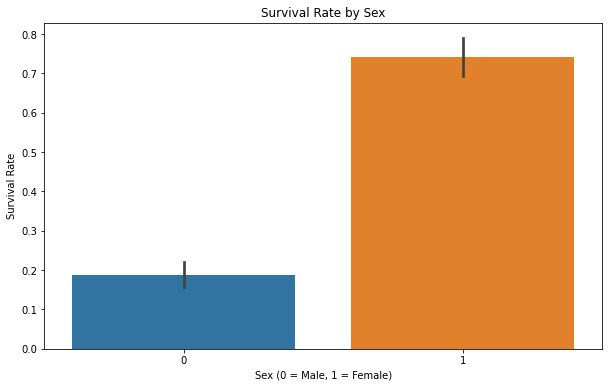

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=df1)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex (0 = Male, 1 = Female)')
plt.ylabel('Survival Rate')
plt.show()

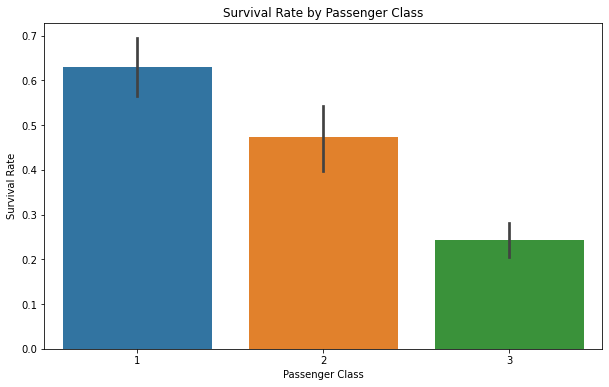

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=df1)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

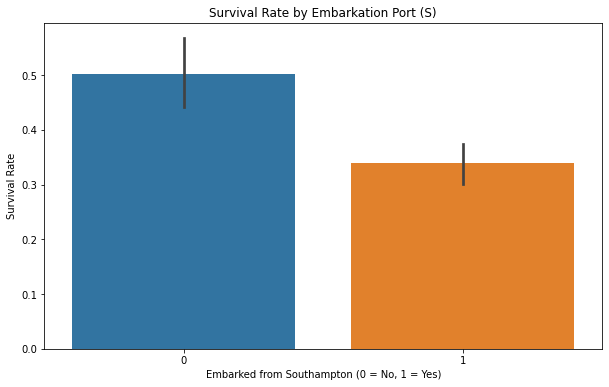

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Embarked_S', y='Survived', data=df1)
plt.title('Survival Rate by Embarkation Port (S)')
plt.xlabel('Embarked from Southampton (0 = No, 1 = Yes)')
plt.ylabel('Survival Rate')
plt.show()

## Multivariate Analysis

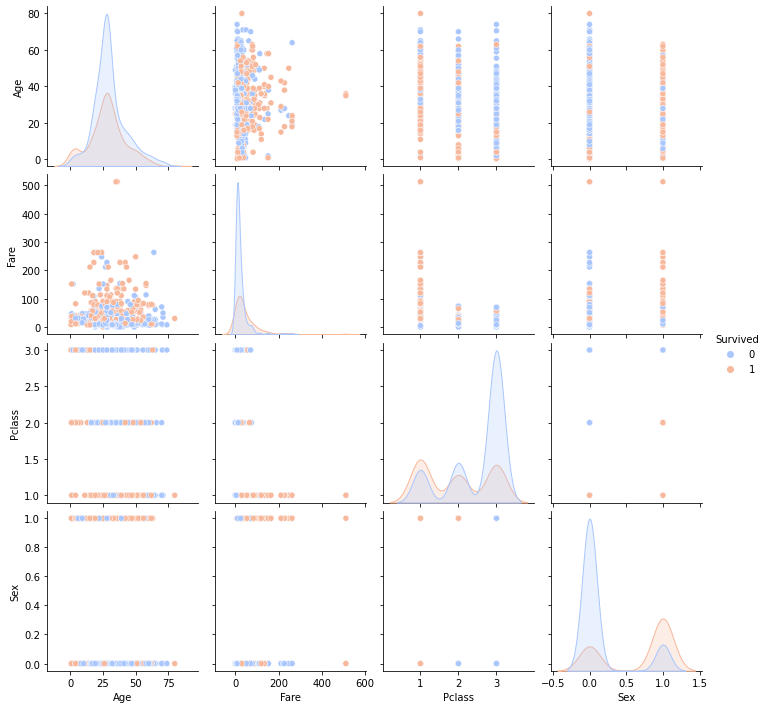

In [17]:
sns.pairplot(df1[['Survived', 'Age', 'Fare', 'Pclass', 'Sex']], hue='Survived', palette='coolwarm')
plt.show()

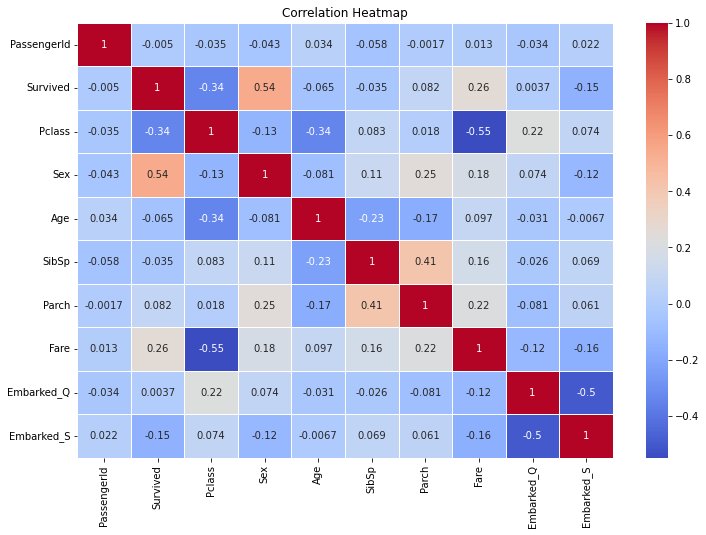

In [18]:
plt.figure(figsize=(12, 8))
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()